FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2024 - QUALIFYING

url : "https://www.formula1.com/en/results/2024/races/1231/australia/qualifying"

    div tag: <table class="f1-table f1-table-with-data w-full">

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage
url = "https://www.formula1.com/en/results/2024/races/1231/australia/qualifying"

# Send a GET request to the webpage
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all <div> tags with the specified class
    comments = soup.find_all('table', class_='f1-table f1-table-with-data w-full')
    
    # Extract and print the text content of each <div>
    for idx, comment in enumerate(comments, 1):
        print(f"Comment {idx}: {comment.get_text(strip=True)}")
else:
    print(f"Failed to fetch the webpage. Status code: {response.status_code}")


Comment 1: PosNoDriverCarQ1Q2Q3Laps11MaxVerstappenVERRed Bull Racing Honda RBPT1:16.8191:16.3871:15.91521255CarlosSainzSAIFerrari1:16.7311:16.1891:16.18518311SergioPerezPERRed Bull Racing Honda RBPT1:16.8051:16.6311:16.2742244LandoNorrisNORMcLaren Mercedes1:17.4301:16.7501:16.31519516CharlesLeclercLECFerrari1:16.9841:16.3041:16.43520681OscarPiastriPIAMcLaren Mercedes1:17.3691:16.6011:16.57218763GeorgeRussellRUSMercedes1:17.0621:16.9011:16.72423822YukiTsunodaTSURB Honda RBPT1:17.3561:16.7911:16.78818918LanceStrollSTRAston Martin Aramco Mercedes1:17.3761:16.7801:17.072231014FernandoAlonsoALOAston Martin Aramco Mercedes1:16.9911:16.7101:17.552211144LewisHamiltonHAMMercedes1:17.4991:16.960151223AlexanderAlbonALBWilliams Mercedes1:17.1301:17.167151377ValtteriBottasBOTKick Sauber Ferrari1:17.5431:17.340151420KevinMagnussenMAGHaas Ferrari1:17.7091:17.427131531EstebanOconOCOAlpine Renault1:17.6171:17.697211627NicoHulkenbergHULHaas Ferrari1:17.97681710PierreGaslyGASAlpine Renault1:17.98211183Da

Convert into dataframe format

In [4]:

for idx, table in enumerate(comments, 1):
    # Extract table rows
    rows = table.find_all('tr')
        
    # Extract headers from the first row
    headers = [header.get_text(strip=True) for header in rows[0].find_all('th')]
        
    # Extract data from subsequent rows
    data = []
    for row in rows[1:]:
        cells = row.find_all('td')
        data.append([cell.get_text(strip=True) for cell in cells])
        
    # Create a DataFrame
    df = pd.DataFrame(data, columns=headers)
print(f"Table {idx} DataFrame:")
print(df)
print("\n")

Table 1 DataFrame:
   Pos  No              Driver                           Car        Q1  \
0    1   1    MaxVerstappenVER    Red Bull Racing Honda RBPT  1:16.819   
1    2  55      CarlosSainzSAI                       Ferrari  1:16.731   
2    3  11      SergioPerezPER    Red Bull Racing Honda RBPT  1:16.805   
3    4   4      LandoNorrisNOR              McLaren Mercedes  1:17.430   
4    5  16   CharlesLeclercLEC                       Ferrari  1:16.984   
5    6  81     OscarPiastriPIA              McLaren Mercedes  1:17.369   
6    7  63    GeorgeRussellRUS                      Mercedes  1:17.062   
7    8  22      YukiTsunodaTSU                 RB Honda RBPT  1:17.356   
8    9  18      LanceStrollSTR  Aston Martin Aramco Mercedes  1:17.376   
9   10  14   FernandoAlonsoALO  Aston Martin Aramco Mercedes  1:16.991   
10  11  44    LewisHamiltonHAM                      Mercedes  1:17.499   
11  12  23   AlexanderAlbonALB             Williams Mercedes  1:17.130   
12  13  77   Valtte

In [5]:
df

,Pos,No,Driver,Car,Q1,Q2,Q3,Laps
0,1,1,MaxVerstappenVER,Red Bull Racing Honda RBPT,1:16.819,1:16.387,1:15.915,21
1,2,55,CarlosSainzSAI,Ferrari,1:16.731,1:16.189,1:16.185,18
2,3,11,SergioPerezPER,Red Bull Racing Honda RBPT,1:16.805,1:16.631,1:16.274,22
3,4,4,LandoNorrisNOR,McLaren Mercedes,1:17.430,1:16.750,1:16.315,19
4,5,16,CharlesLeclercLEC,Ferrari,1:16.984,1:16.304,1:16.435,20
5,6,81,OscarPiastriPIA,McLaren Mercedes,1:17.369,1:16.601,1:16.572,18
6,7,63,GeorgeRussellRUS,Mercedes,1:17.062,1:16.901,1:16.724,23
7,8,22,YukiTsunodaTSU,RB Honda RBPT,1:17.356,1:16.791,1:16.788,18
8,9,18,LanceStrollSTR,Aston Martin Aramco Mercedes,1:17.376,1:16.780,1:17.072,23
9,10,14,FernandoAlonsoALO,Aston Martin Aramco Mercedes,1:16.991,1:16.710,1:17.552,21


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Pos     19 non-null     object
 1   No      19 non-null     object
 2   Driver  19 non-null     object
 3   Car     19 non-null     object
 4   Q1      19 non-null     object
 5   Q2      19 non-null     object
 6   Q3      19 non-null     object
 7   Laps    19 non-null     object
dtypes: object(8)
memory usage: 1.3+ KB


In [7]:
check_null = df['Q3'].tail()
print(check_null.to_list())

['', '', '', '', '']


Here is the null value but no function can be used to check. But with the naked eye we can also see the value here if we use the function there will be an error. So we will set it back to 0:0.0

In [8]:
def replace_null(a,q):
    a[q] =a[q].replace('', '0:0.0')
    return a
replace_null(df,'Q2')
replace_null(df,'Q3')

,Pos,No,Driver,Car,Q1,Q2,Q3,Laps
0,1,1,MaxVerstappenVER,Red Bull Racing Honda RBPT,1:16.819,1:16.387,1:15.915,21
1,2,55,CarlosSainzSAI,Ferrari,1:16.731,1:16.189,1:16.185,18
2,3,11,SergioPerezPER,Red Bull Racing Honda RBPT,1:16.805,1:16.631,1:16.274,22
3,4,4,LandoNorrisNOR,McLaren Mercedes,1:17.430,1:16.750,1:16.315,19
4,5,16,CharlesLeclercLEC,Ferrari,1:16.984,1:16.304,1:16.435,20
5,6,81,OscarPiastriPIA,McLaren Mercedes,1:17.369,1:16.601,1:16.572,18
6,7,63,GeorgeRussellRUS,Mercedes,1:17.062,1:16.901,1:16.724,23
7,8,22,YukiTsunodaTSU,RB Honda RBPT,1:17.356,1:16.791,1:16.788,18
8,9,18,LanceStrollSTR,Aston Martin Aramco Mercedes,1:17.376,1:16.780,1:17.072,23
9,10,14,FernandoAlonsoALO,Aston Martin Aramco Mercedes,1:16.991,1:16.710,1:17.552,21


Drop column : Laps

In [9]:
df = df.drop('Laps', axis=1)

Since the time values for each round (e.g., Q1, Q2, Q3) are in object format, I can convert them to milliseconds for easier comparison. However, the challenge lies in the fact that the datetime function expects a format like 0:00:000, whereas the given format is 0:00.00, making it difficult to work with directly. The solution is to write a custom function to transform this format into an integer value.

In [10]:
def parse_time(time_str):
    minutes, rest = time_str.split(":")
    seconds, milliseconds = rest.split(".")
    return int(minutes), int(seconds), int(milliseconds)
    
parse_time('0:0.0')

(0, 0, 0)

In [11]:
def milisecond(time_str):
    a,b,c = parse_time(time_str)
    a = a * 60
    b = a + b
    d = b * 1000 + c
    return d

In [12]:
def change_mili(df, q):
    # Kiểm tra cột q có tồn tại trong DataFrame không
    if q not in df.columns:
        raise ValueError(f"Cột '{q}' không tồn tại trong DataFrame.")
    # Trả về DataFrame mới chỉ chứa cột q
    df[[q]] = df[q].apply(
    lambda x: pd.Series(milisecond(x)))
    return df


In [13]:
def quali_to_milisecond(race,q1,q2,q3):
    race = change_mili(race, q1)
    race = change_mili(race, q2)
    race = change_mili(race, q3)
    return race

df = quali_to_milisecond(df,'Q1','Q2','Q3')
df

,Pos,No,Driver,Car,Q1,Q2,Q3
0,1,1,MaxVerstappenVER,Red Bull Racing Honda RBPT,76819,76387,75915
1,2,55,CarlosSainzSAI,Ferrari,76731,76189,76185
2,3,11,SergioPerezPER,Red Bull Racing Honda RBPT,76805,76631,76274
3,4,4,LandoNorrisNOR,McLaren Mercedes,77430,76750,76315
4,5,16,CharlesLeclercLEC,Ferrari,76984,76304,76435
5,6,81,OscarPiastriPIA,McLaren Mercedes,77369,76601,76572
6,7,63,GeorgeRussellRUS,Mercedes,77062,76901,76724
7,8,22,YukiTsunodaTSU,RB Honda RBPT,77356,76791,76788
8,9,18,LanceStrollSTR,Aston Martin Aramco Mercedes,77376,76780,77072
9,10,14,FernandoAlonsoALO,Aston Martin Aramco Mercedes,76991,76710,77552


Qualifying 1

In [32]:
# Tìm giá trị nhỏ nhất khác 0 trong cột Q1
min_nonzero_Q1 = df['Q1'][df['Q1'] > 0].min()
max_nonzero_Q1 = df['Q1'][df['Q1'] > 0].max()
print("Giá trị nhỏ nhất khác 0 trong cột Q1:", min_nonzero_Q1)
print("Giá trị lớn nhất trong cột Q1:", max_nonzero_Q1)

Giá trị nhỏ nhất khác 0 trong cột Q1: 76731
Giá trị lớn nhất trong cột Q1: 78188


C:\Users\manhh\AppData\Local\Temp\ipykernel_4028\978336465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Q1', y='Driver', palette='Set2',orient='h')


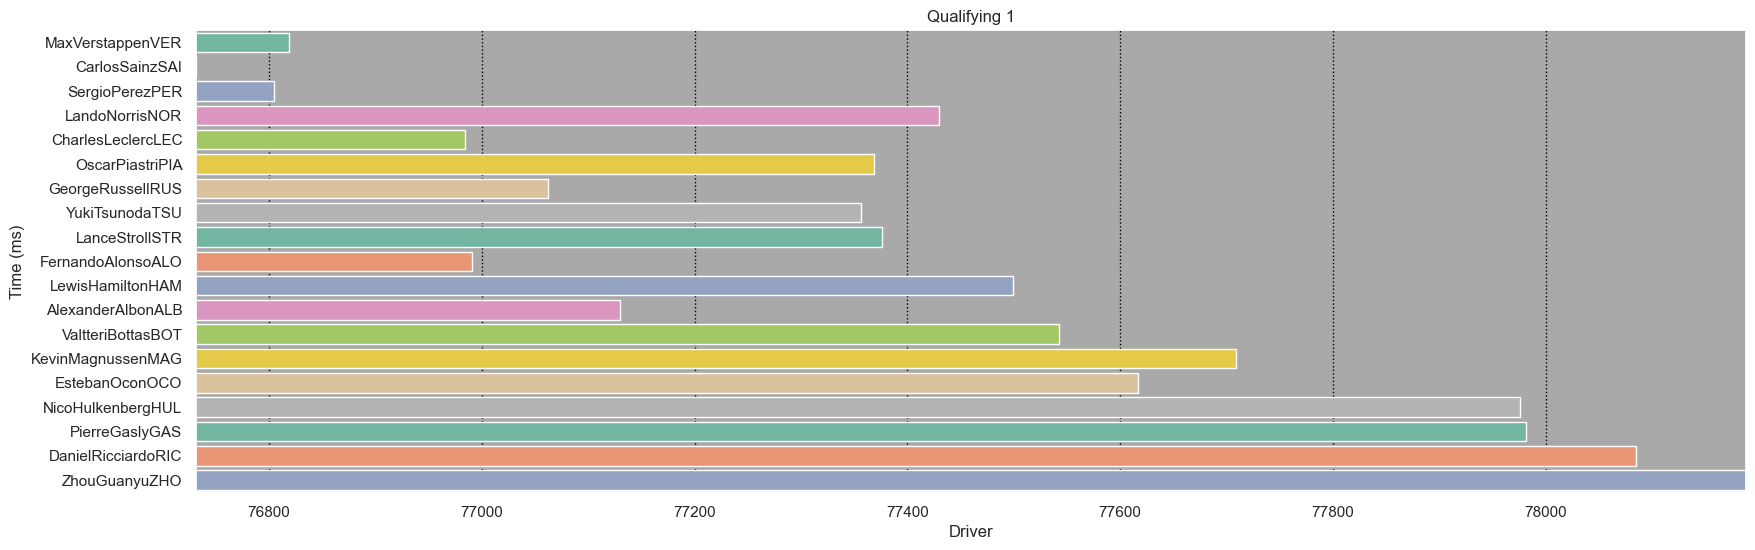

In [33]:
# Vẽ biểu đồ bar plot
sns.set(rc={"axes.facecolor": "darkgrey", "grid.color": "black", "grid.linestyle": ":"})

plt.figure(figsize=(20, 6))
sns.barplot(data=df, x='Q1', y='Driver', palette='Set2',orient='h')

plt.xlim(min_nonzero_Q1, max_nonzero_Q1)
# plt.yticks(rotation=90)
# Thêm tiêu đề và nhãn
plt.title('Qualifying 1')

plt.ylabel('Time (ms)')
plt.xlabel('Driver') 
# Hiển thị biểu đồ
plt.show()

Qualifying 2

In [36]:
df_quali2 = df[df['Q2'] != 0]

In [34]:
# Tìm giá trị nhỏ nhất khác 0 trong cột Q2
min_nonzero_Q2 = df['Q2'][df['Q2'] > 0].min()
max_nonzero_Q2 = df['Q2'][df['Q2'] > 0].max()
print("Giá trị nhỏ nhất khác 0 trong cột Q2:", min_nonzero_Q2)
print("Giá trị lớn nhất trong cột Q2:", max_nonzero_Q2)

Giá trị nhỏ nhất khác 0 trong cột Q2: 76189
Giá trị lớn nhất trong cột Q2: 77697


C:\Users\manhh\AppData\Local\Temp\ipykernel_4028\201258960.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_quali2 , x='Q2', y='Driver', palette='Set2',orient='h')


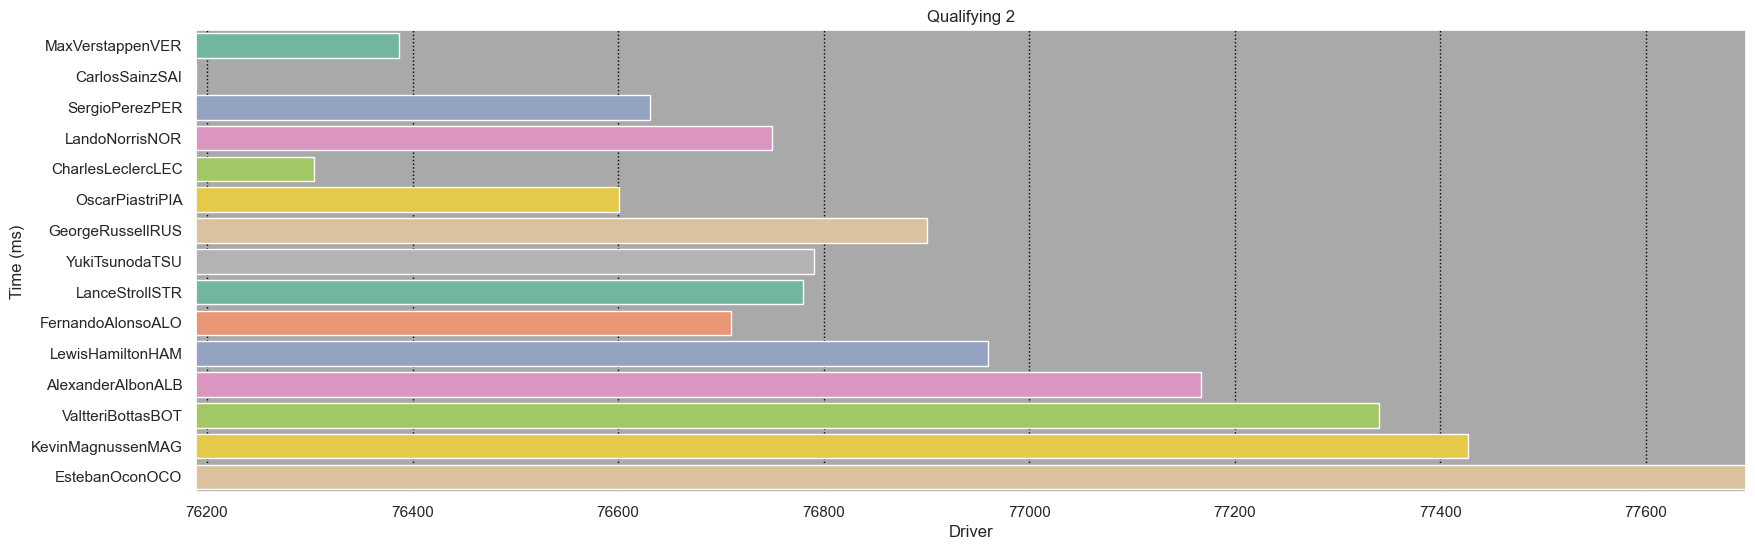

In [43]:
# Vẽ biểu đồ bar plot
sns.set(rc={"axes.facecolor": "darkgrey", "grid.color": "black", "grid.linestyle": ":"})

plt.figure(figsize=(20, 6))
sns.barplot(data=df_quali2 , x='Q2', y='Driver', palette='Set2',orient='h')

plt.xlim(min_nonzero_Q2, max_nonzero_Q2)
# plt.yticks(rotation=90)
# Thêm tiêu đề và nhãn
plt.title('Qualifying 2')

plt.ylabel('Time (ms)')
plt.xlabel('Driver') 
# Hiển thị biểu đồ
plt.show()

Qualifying 3

In [40]:
df_quali3 = df[df['Q3'] != 0]
# Tìm giá trị nhỏ nhất khác 0 trong cột Q2
min_nonzero_Q3 = df['Q3'][df['Q3'] > 0].min()
max_nonzero_Q3= df['Q3'][df['Q3'] > 0].max()
print("Giá trị nhỏ nhất khác 0 trong cột Q3:", min_nonzero_Q3)
print("Giá trị lớn nhất trong cột Q3:", max_nonzero_Q3)

Giá trị nhỏ nhất khác 0 trong cột Q3: 75915
Giá trị lớn nhất trong cột Q3: 77552


C:\Users\manhh\AppData\Local\Temp\ipykernel_4028\2317425889.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_quali3, x='Q3', y='Driver', palette='Set2',orient='h')


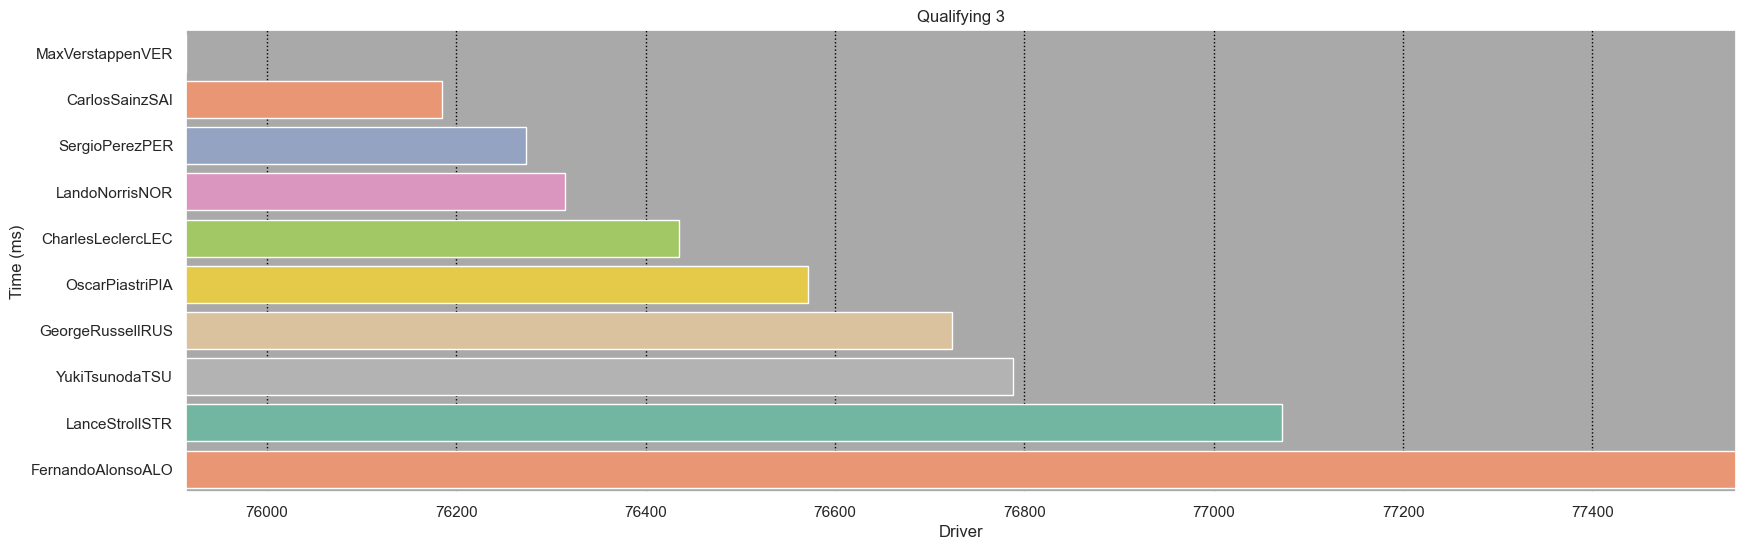

In [44]:
# Vẽ biểu đồ bar plot
sns.set(rc={"axes.facecolor": "darkgrey", "grid.color": "black", "grid.linestyle": ":"})
plt.figure(figsize=(20, 6))
sns.barplot(data=df_quali3, x='Q3', y='Driver', palette='Set2',orient='h')
plt.xlim(min_nonzero_Q3, max_nonzero_Q3)
# plt.yticks(rotation=90)
# Thêm tiêu đề và nhãn
plt.title('Qualifying 3')
plt.ylabel('Time (ms)')
plt.xlabel('Driver') 
# Hiển thị biểu đồ
plt.show()